In [1]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/
%run Path_manager_GoogleColab.py

pm = PathManager()

import os
import importlib
import scvi
from scvi.hub import HubModel


# importlib.reload(Path_manager_GoogleColab)

os.getcwd()



Mounted at /content/drive
/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation


'/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation'

In [12]:

import sys
import os

sys.path.append('H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation')

from function.Path_manager_local import *
import function.Path_manager_local


import function
import model_n_loss


from function import plt,Path_manager_local,utils,utils_2,Split_AnnData
from  function.Path_manager_local import *
from  function.utils import *
from  function.utils_2 import *
from  function.Split_AnnData import *

import os, sys , json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
import scanpy 

import model_n_loss
from model_n_loss.Vae_v2 import *
from model_n_loss.Vae_v1 import *
from model_n_loss.loss import *

#import squidpy as sq
from scipy.stats import pearsonr
from function import utils
# from importlib import reload
from function.utils import *


seed = 42
torch.manual_seed(seed)
#importlib.reload(function.Path_manager_local)

from function.plt import *
from function.utils import *
from function.utils_2 import *
from function.Split_AnnData import *

import scvi 

In [2]:
# Load TMA data (Scanpy AnnData objects)
tma_data = pm.load_tma_objects()

tma_data_subset_inference = tma_data[0:1].copy()
tma_data = tma_data[1:].copy()
print(f"Training dataset: {len(tma_data)}")
print(f"Inference dataset: {len(tma_data_subset_inference)}")


# Load EcoFoundation objects
eco_data = pm.load_eco_objects()

taking from : /content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_*.h5ad
['/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_1.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_10.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_11.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_12.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_13.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_14.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/data/Processed/Processed_new_TMA_1_15.h5ad', '/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foun

## Run on local 

In [13]:
# Load TMA data (Scanpy AnnData objects)
tma_data = get_tma_objects()
# By default, it looks for "./data/Processed/Processed_new_TMA_*.h5ad"

# Load EcoFoundation objects
eco_data = get_eco_objects()

Loaded: Processed_new_TMA_1_1.h5ad
Loaded: Processed_new_TMA_1_10.h5ad
Loaded: Processed_new_TMA_1_11.h5ad
Loaded: Processed_new_TMA_1_12.h5ad
Loaded: Processed_new_TMA_1_13.h5ad
Loaded: Processed_new_TMA_1_14.h5ad
Loaded: Processed_new_TMA_1_15.h5ad
Loaded: Processed_new_TMA_1_16.h5ad
Loaded: Processed_new_TMA_1_17.h5ad
Loaded: Processed_new_TMA_1_18.h5ad
Loaded: Processed_new_TMA_1_19.h5ad
Loaded: Processed_new_TMA_1_2.h5ad
Loaded: Processed_new_TMA_1_20.h5ad
Loaded: Processed_new_TMA_1_21.h5ad
Loaded: Processed_new_TMA_1_22.h5ad
Loaded: Processed_new_TMA_1_23.h5ad
Loaded: Processed_new_TMA_1_24.h5ad
Loaded: Processed_new_TMA_1_25.h5ad
Loaded: Processed_new_TMA_1_26.h5ad
Loaded: Processed_new_TMA_1_27.h5ad
Loaded: Processed_new_TMA_1_28.h5ad
Loaded: Processed_new_TMA_1_29.h5ad
Loaded: Processed_new_TMA_1_3.h5ad
Loaded: Processed_new_TMA_1_30.h5ad
Loaded: Processed_new_TMA_1_31.h5ad
Loaded: Processed_new_TMA_1_32.h5ad
Loaded: Processed_new_TMA_1_33.h5ad
Loaded: Processed_new_TMA_1_34.

In [22]:
cell_nbr=0
for i in tma_data:
    cell_nbr+=int(i.n_obs)
print(cell_nbr)


463844


# From scratch

In [23]:
adatas_concat = ad.concat(tma_data,label="batch")
print(adatas_concat)


AnnData object with n_obs × n_vars = 463844 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'celltype', 'leiden', 'batch'
    obsm: 'X_pca', 'X_umap', 'pca', 'spatial', 'umap'
    layers: 'counts', 'norm'


In [24]:
adatas_concat.obs['batch']

TMA_1_1_3047593800130100001     0
TMA_1_1_3047593800130100002     0
TMA_1_1_3047593800130100003     0
TMA_1_1_3047593800130100004     0
TMA_1_1_3047593800130100006     0
                               ..
TMA_2_9_3061545002710200018    73
TMA_2_9_3061545002710200044    73
TMA_2_9_3061545002710200053    73
TMA_2_9_3061545002710200068    73
TMA_2_9_3061545002710200163    73
Name: batch, Length: 463844, dtype: category
Categories (74, object): ['0', '1', '2', '3', ..., '70', '71', '72', '73']

In [25]:
scvi.model.SCVI.setup_anndata(
    adatas_concat,
    batch_key="batch",
    layer='counts'  # if raw counts are in adatas_concat.layers["counts"]
)



In [26]:
model = scvi.model.SCVI(
    adatas_concat,      # the AnnData prepared above
    n_hidden=128,       # number of nodes per hidden layer (default is 128)
    n_latent=30,        # dimensionality of the latent space (e.g., 30)
    n_layers=2,         # number of hidden layers in encoder/decoder (e.g., 2)
    gene_likelihood="zinb"  # use Negative Binomial likelihood for counts
)
print(model)  # Print model summary

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [15]:
# Train the SCVI model
model.train(
    max_epochs=400,          # maximum number of epochs (default is 400)
    early_stopping=True,     # enable early stopping based on validation loss
    check_val_every_n_epoch=1,  # evaluate validation loss every epoch
    plan_kwargs={"lr": 1e-6}    # (optional) set learning rate or other training plan args
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for p

Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [22]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

In [18]:
print(model.history.keys())


dict_keys(['kl_weight', 'train_loss_step', 'validation_loss', 'elbo_validation', 'reconstruction_loss_validation', 'kl_local_validation', 'kl_global_validation', 'train_loss_epoch', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train', 'kl_global_train'])


In [21]:
# save model :
model.save('/content/drive/MyDrive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi')


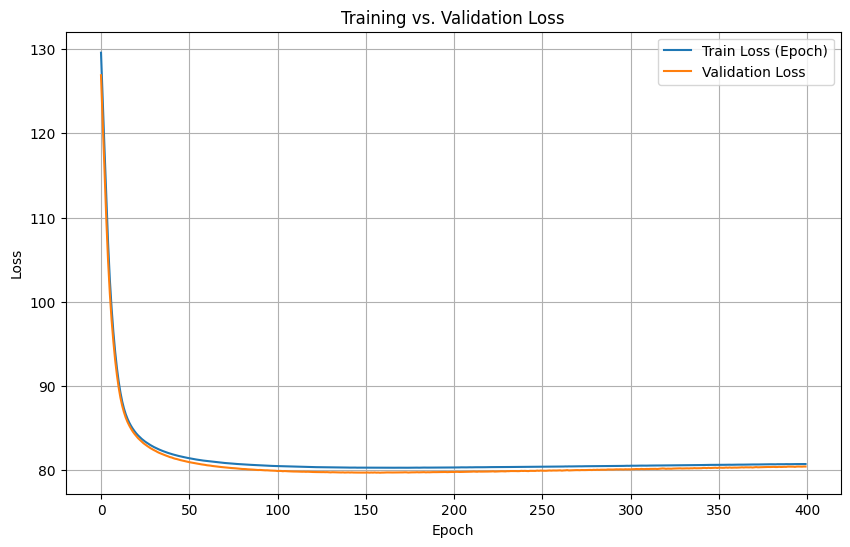

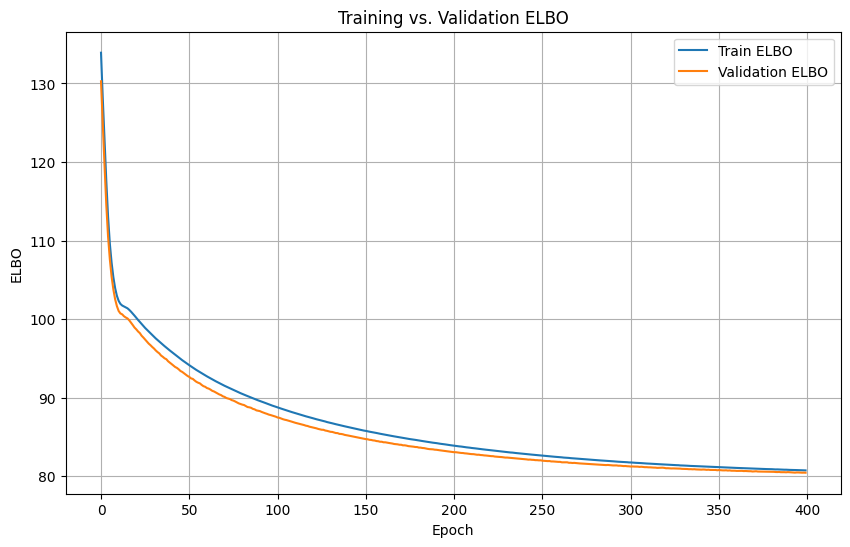

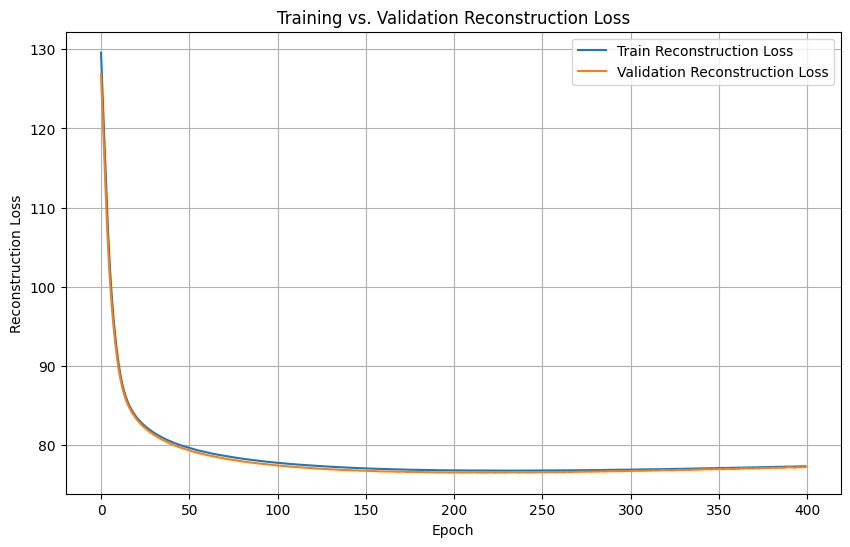

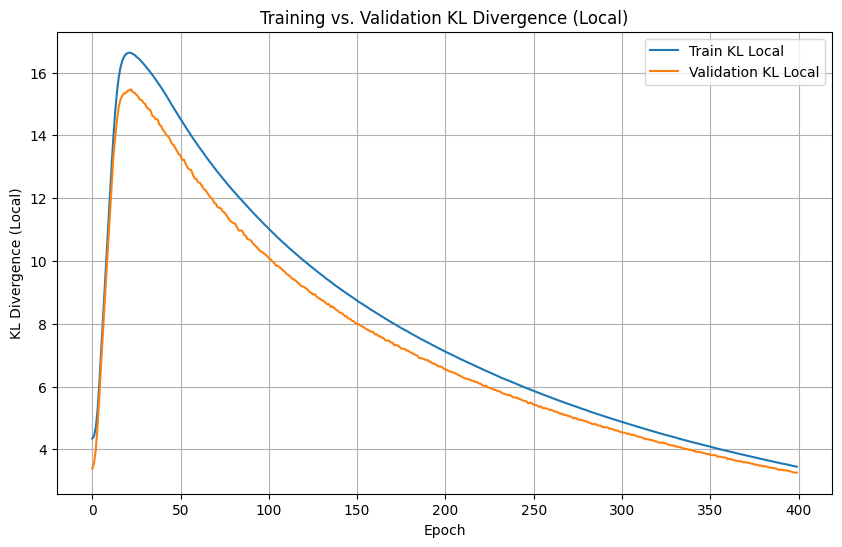

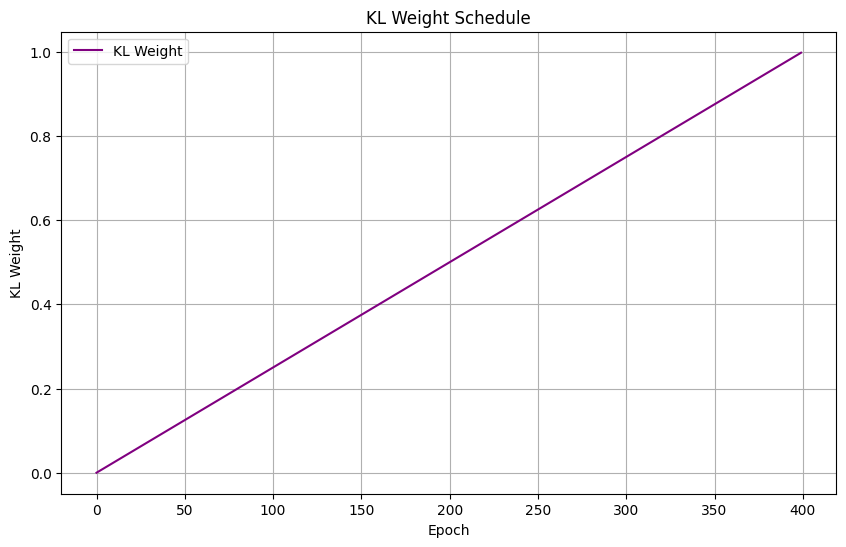

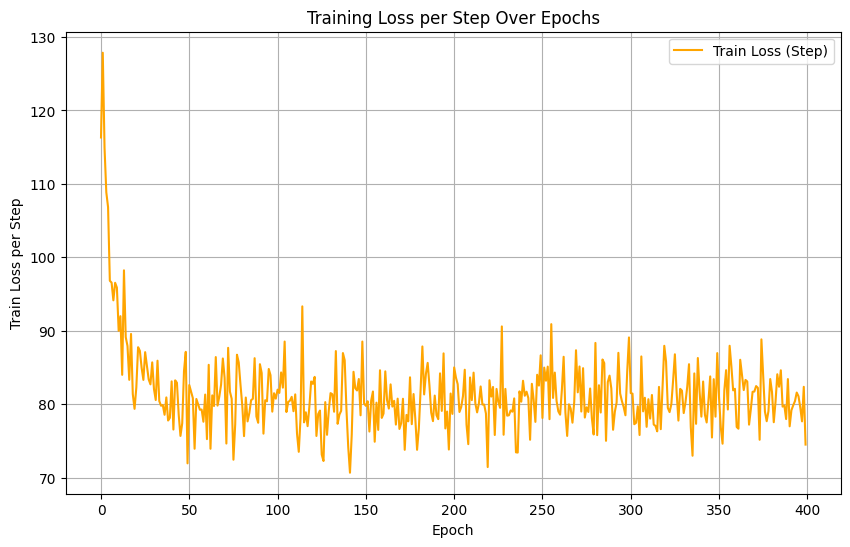

In [23]:
import matplotlib.pyplot as plt

# Assume model.history is your dictionary containing DataFrames for each metric.
history = model.history

# -------------------------------
# Plot Training vs. Validation Loss (Epoch-level)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss_epoch'].index, history['train_loss_epoch'].values, label='Train Loss (Epoch)')
plt.plot(history['validation_loss'].index, history['validation_loss'].values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot ELBO (Evidence Lower Bound)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['elbo_train'].index, history['elbo_train'].values, label='Train ELBO')
plt.plot(history['elbo_validation'].index, history['elbo_validation'].values, label='Validation ELBO')
plt.xlabel('Epoch')
plt.ylabel('ELBO')
plt.title('Training vs. Validation ELBO')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot Reconstruction Loss
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['reconstruction_loss_train'].index, history['reconstruction_loss_train'].values, label='Train Reconstruction Loss')
plt.plot(history['reconstruction_loss_validation'].index, history['reconstruction_loss_validation'].values, label='Validation Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
plt.title('Training vs. Validation Reconstruction Loss')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot KL Divergence (Local)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['kl_local_train'].index, history['kl_local_train'].values, label='Train KL Local')
plt.plot(history['kl_local_validation'].index, history['kl_local_validation'].values, label='Validation KL Local')
plt.xlabel('Epoch')
plt.ylabel('KL Divergence (Local)')
plt.title('Training vs. Validation KL Divergence (Local)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot KL Weight Schedule
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['kl_weight'].index, history['kl_weight'].values, label='KL Weight', color='purple')
plt.xlabel('Epoch')
plt.ylabel('KL Weight')
plt.title('KL Weight Schedule')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot Train Loss per Step (if applicable)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss_step'].index, history['train_loss_step'].values, label='Train Loss (Step)', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Train Loss per Step')
plt.title('Training Loss per Step Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate model latent representation through Umap representation


In [24]:
tma_data_subset_inference = tma_data_subset_inference[0]

In [25]:
tma_data_subset_inference.obs["batch"] = "0"

In [32]:
tma_data_subset_inference

AnnData object with n_obs × n_vars = 7616 × 500
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'celltype', 'leiden', 'batch', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Graph_DF', 'barcode_mapping', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap', 'pca', 'spatial', 'umap'
    varm: 'PCs'
    layers: 'counts', 'norm'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [26]:
scvi.model.SCVI.setup_anndata(
    tma_data_subset_inference,
    layer='counts'  # if raw counts are in adatas_concat.layers["counts"]
)

In [27]:
latent = model.get_latent_representation(tma_data_subset_inference)
adata_try = tma_data_subset_inference.copy()

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


In [28]:
latent.shape

(7616, 30)

In [29]:
adata_try.obsm['X_scvi_latent'] = latent
print(latent.shape)

(7616, 30)


Henrik reconstruction code :

In [30]:
def get_gene_expression_scvi(model, adata, device="gpu"):
    # Ensure model and adata are on the proper device if needed.
    model.to(device)
    # Get reconstructed (normalized) gene expression directly from SCVI
    reconstructed = model.get_normalized_expression(adata, transform_batch=None)
    return reconstructed

Latent space shape: (7616, 30)
Reconstructed gene expression shape: (7616, 500)


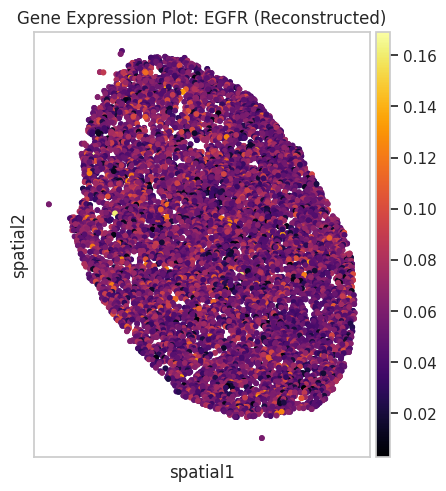

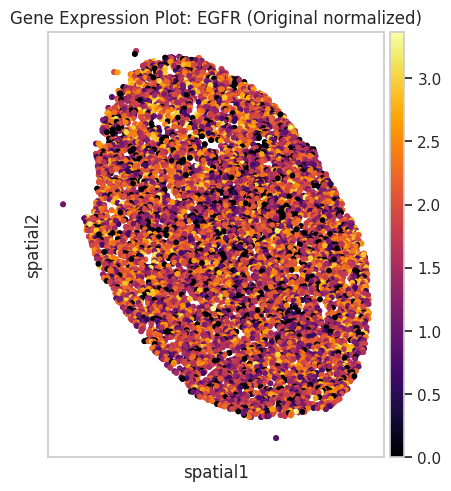

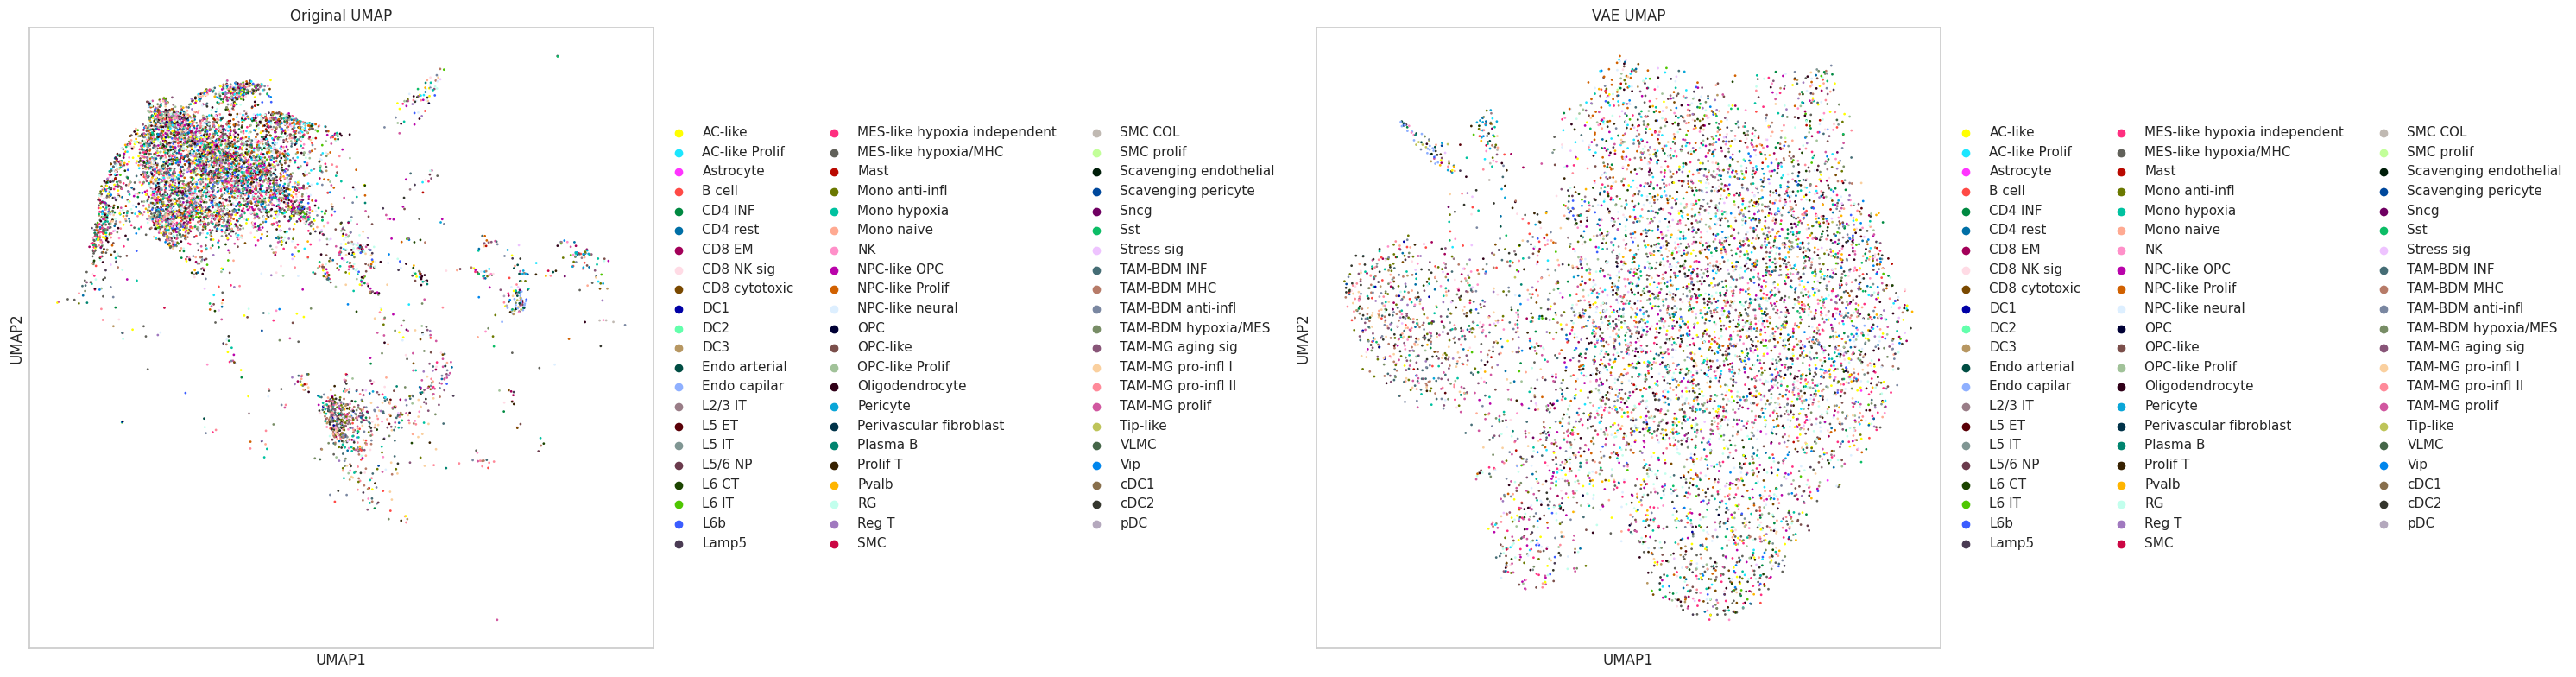

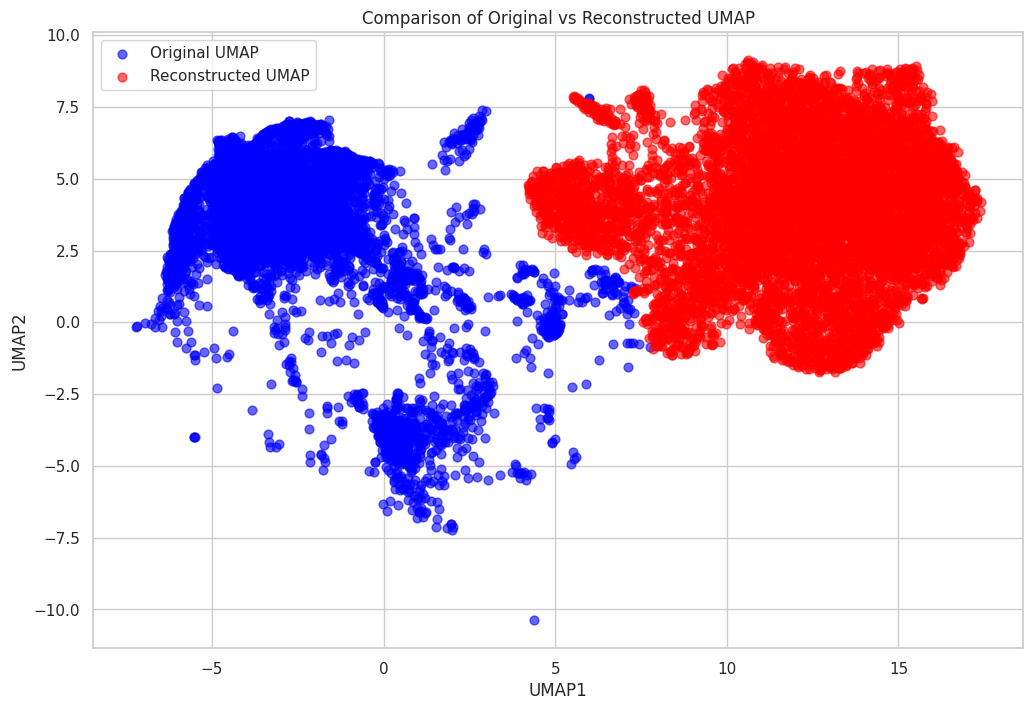


UMAP coordinate correlations:
UMAP1: r=-0.5820 (p=0.0000e+00)
UMAP2: r=0.1425 (p=7.7213e-36)


In [34]:
import squidpy as sq
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def compare_umap_real_vs_reconstructed(trained_model, adata, gene="EGFR", device="cpu"):
    """
    Compare Original UMAP with Reconstructed UMAP computed from the VAE latent space.
    The function:
      1. Obtains the latent space using the trained model.
      2. Reconstructs gene expression from the latent space.
      3. Computes a new UMAP using the latent representation.
      4. Compares the new (reconstructed) UMAP with the original UMAP.
      5. Optionally displays spatial gene expression plots for a given gene.
    """
    # --- Step 1: Compute latent space and reconstructed gene expression ---
    # Use the model’s method to get the latent representation.
    latent = trained_model.get_latent_representation(adata)
    print("Latent space shape:", latent.shape)

    # Get the reconstructed gene expression (assuming get_gene_expression is defined)
    recon = trained_model.get_normalized_expression(adata, transform_batch=None)
    print("Reconstructed gene expression shape:", recon.shape)

    # --- Step 2: Create a copy of the AnnData for UMAP visualization ---
    # Here we use adata_try as the copy (as per your usage)
    adata_try = adata.copy()

    # --- Step 3: Store latent representation and reconstruction ---
    adata_try.obsm["VAE_latent"] = latent
    adata_try.layers["X_VAE"] = recon

    # --- Step 4: Plot spatial gene expression (if a gene is specified) ---
    if gene is not None:
        # Plot reconstructed gene expression spatially
        adata_exp = adata.copy()
        adata_exp.X = recon  # Use reconstructed data for visualization
        sns.set(style="whitegrid")
        sq.pl.spatial_scatter(adata_exp,
                              shape=None,
                              color=[gene],
                              size=40,
                              cmap="inferno")
        plt.title(f"Gene Expression Plot: {gene} (Reconstructed)")
        plt.show()

        # Plot original normalized gene expression spatially
        # (Assuming normalized data is stored in adata.layers["norm"])
        adata_orig = adata.copy()
        adata_orig.X = adata_orig.layers["norm"]
        sns.set(style="whitegrid")
        sq.pl.spatial_scatter(adata_orig,
                              shape=None,
                              color=[gene],
                              size=40,
                              cmap="inferno")
        plt.title(f"Gene Expression Plot: {gene} (Original normalized)")
        plt.show()

    # --- Step 5: Retrieve the original UMAP coordinates ---
    #  original UMAP coordinates is stored under 'umap'
    original_umap = adata.obsm['umap'].copy()

    # --- Step 6: Compute new UMAP from the latent space ---
    sc.pp.neighbors(adata_try, use_rep="VAE_latent")
    sc.tl.umap(adata_try)
    # New UMAP coordinates will be stored in adata_try.obsm['X_umap']
    reconstructed_umap = adata_try.obsm['X_umap'].copy()

    # --- Step 7: Plot the Original and Reconstructed UMAP side-by-side ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))

    # For plotting, temporarily assign the desired coordinates to a key used by sc.pl.umap.
    # Plot the original UMAP.
    adata_try.obsm['umap'] = original_umap
    sc.pl.umap(adata_try,
               color=['celltype'],
               ax=ax1,
               show=False,
               title='Original UMAP')

    # Plot the UMAP computed from the VAE latent space.
    adata_try.obsm['umap'] = reconstructed_umap
    sc.pl.umap(adata_try,
               color=['celltype'],
               ax=ax2,
               show=False,
               title='VAE UMAP')

    plt.tight_layout()
    plt.show()

    # --- Step 8: Overlay Plot for Direct Comparison ---
    plt.figure(figsize=(12, 8))
    plt.scatter(original_umap[:, 0], original_umap[:, 1],
                c='blue', label='Original UMAP', alpha=0.6, s=40)
    plt.scatter(reconstructed_umap[:, 0], reconstructed_umap[:, 1],
                c='red', label='Reconstructed UMAP', alpha=0.6, s=40)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title('Comparison of Original vs Reconstructed UMAP')
    plt.legend()
    plt.show()

    # --- Step 9: Compute and Print Pearson Correlations for UMAP Coordinates ---
    corr_umap1, p1 = pearsonr(original_umap[:, 0], reconstructed_umap[:, 0])
    corr_umap2, p2 = pearsonr(original_umap[:, 1], reconstructed_umap[:, 1])
    print(f"\nUMAP coordinate correlations:")
    print(f"UMAP1: r={corr_umap1:.4f} (p={p1:.4e})")
    print(f"UMAP2: r={corr_umap2:.4f} (p={p2:.4e})")

    return original_umap, reconstructed_umap

# === Example usage ===
# Here, tma_data_subset_inference is your AnnData object.
original, reconstructed = compare_umap_real_vs_reconstructed(
    trained_model=model,
    adata=tma_data_subset_inference,
    gene="EGFR",
    device="cuda"
)


# GAT : classification 

###  eco object : 

In [14]:
eco_data[:5]

[<EcoFoundationObject with 13 features in meta and 122 subgraphs in the object>,
 <EcoFoundationObject with 13 features in meta and 165 subgraphs in the object>,
 <EcoFoundationObject with 13 features in meta and 36 subgraphs in the object>,
 <EcoFoundationObject with 13 features in meta and 78 subgraphs in the object>,
 <EcoFoundationObject with 13 features in meta and 98 subgraphs in the object>]

In [37]:
## Load Scvi model trained : 

model = torch.load('H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi/model.pt', weights_only=False,map_location=torch.device('cpu'))
# should have save the scvi model using model.save() function of scvi not of torch ... 

scvi.model.SCVI.setup_anndata(
    adatas_concat,
    batch_key="batch",
    layer='counts'  # if raw counts are in adatas_concat.layers["counts"]
)

# Suppose you have your original AnnData adata and SCVI arguments
new_model = SCVI(adata)  # use the same setup as the original model
new_model.module.load_state_dict(torch.load("model_params.pt"))
#model = scvi.model.SCVI.load('H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi/model.pt')



<class 'NoneType'>


In [39]:

model = scvi.model.SCVI.load("H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi/model.pt/")


INFO     No backup URL provided for missing file H:/Mon                                                            
         Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi/model.pt/model.pt    


ValueError: Failed to load model file at H:/Mon Drive/LabMembers/Hamid/Eco_Foundation/Eco_Foundation/train_model_notebook/Saved_scvi/model.pt/model.pt. If attempting to load a saved model from <v0.15.0, please use the util function `convert_legacy_save` to convert to an updated format.

In [ ]:
import scvi


for i, adata in enumerate(tma_data):
    # Get latent representation from scVI
    latent = scvi_model.get_latent_representation(adata)
    adata.obsm["X_scvi"] = latent
    print(f"Patient {i} -> latent shape: {latent.shape}")
